# Predicting US Elections with Twitter Sentiment Analysis

This notebook performs sentiment analysis on tweets made towards the US presidential candidates – Donald Trump and Joe Biden – to predict who is more favored based on public sentiment.

We use:
- Twitter datasets for each candidate
- TextBlob for sentiment analysis
- Plotly for visualization

**Disclaimer**: This is a basic sentiment analysis and does not reflect real-world voting behavior or actual election results.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud

In [3]:
trump_reviews = pd.read_csv("Trumptweets.csv")
biden_reviews = pd.read_csv("Bidentweets.csv")

trump_reviews.head(), biden_reviews.head()

(              user                                               text
 0      manny_rosen   @sanofi please tell us how many shares the Cr...
 1        osi_abdul   https://t.co/atM98CpqF7  Like, comment, RT #P...
 2          Patsyrw   Your AG Barr is as useless &amp; corrupt as y...
 3  seyedebrahimi_m   Mr. Trump! Wake Up!  Most of the comments bel...
 4    James09254677   After 4 years you think you would have figure...,
            user                                               text
 0   MarkHodder3    @JoeBiden And we’ll find out who won in 2026...
 1    K87327961G  @JoeBiden Your Democratic Nazi Party cannot be...
 2      OldlaceA                        @JoeBiden So did Lying Barr
 3    penblogger  @JoeBiden It's clear you didnt compose this tw...
 4  Aquarian0264         @JoeBiden I will vote in person thank you.)

In [4]:
trump_reviews.dropna(inplace=True)
biden_reviews.dropna(inplace=True)

def clean_text(text):
    import re
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"[^A-Za-z\s]", "", text)
    return text.strip().lower()

trump_reviews["clean_text"] = trump_reviews["text"].apply(clean_text)
biden_reviews["clean_text"] = biden_reviews["text"].apply(clean_text)

In [5]:
def find_pol(review):
    return TextBlob(review).sentiment.polarity

trump_reviews["Sentiment Polarity"] = trump_reviews["clean_text"].apply(find_pol)
biden_reviews["Sentiment Polarity"] = biden_reviews["clean_text"].apply(find_pol)

In [6]:
trump_reviews["Expression Label"] = np.where(trump_reviews["Sentiment Polarity"] > 0, "positive", "negative")
trump_reviews.loc[trump_reviews["Sentiment Polarity"] == 0, "Expression Label"] = "Neutral"

biden_reviews["Expression Label"] = np.where(biden_reviews["Sentiment Polarity"] > 0, "positive", "negative")
biden_reviews.loc[biden_reviews["Sentiment Polarity"] == 0, "Expression Label"] = "Neutral" 

In [7]:
trump_reviews = trump_reviews[trump_reviews["Expression Label"] != "Neutral"]
biden_reviews = biden_reviews[biden_reviews["Expression Label"] != "Neutral"]

In [8]:
np.random.seed(10)
trump_reviews = trump_reviews.sample(n=1000, replace=False)
biden_reviews = biden_reviews.sample(n=1000, replace=False)

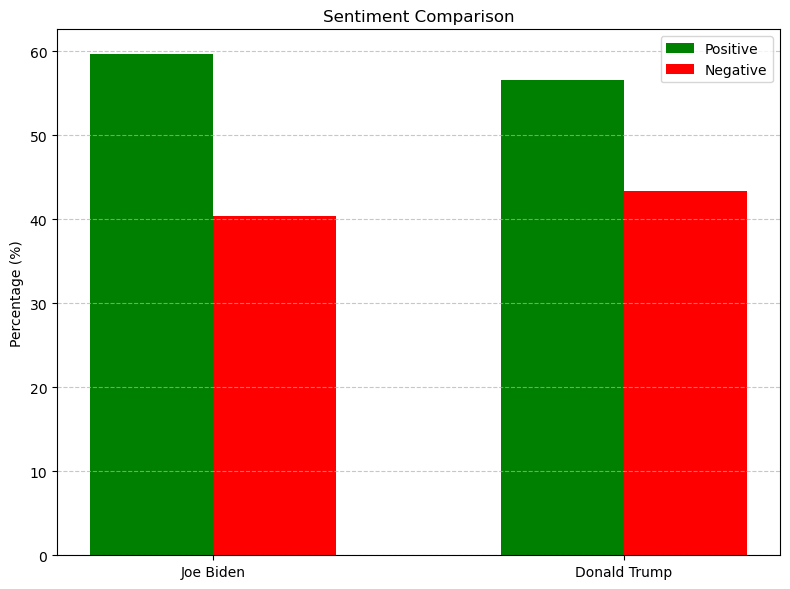

In [13]:
# Data
count_1 = trump_reviews["Expression Label"].value_counts()
count_2 = biden_reviews["Expression Label"].value_counts()

total_trump = len(trump_reviews)
total_biden = len(biden_reviews)

positive_per1 = (count_1.get("positive", 0) / total_trump) * 100
negative_per1 = (count_1.get("negative", 0) / total_trump) * 100

positive_per2 = (count_2.get("positive", 0) / total_biden) * 100
negative_per2 = (count_2.get("negative", 0) / total_biden) * 100

politicians = ['Joe Biden', 'Donald Trump']
positive = [positive_per2, positive_per1]
negative = [negative_per2, negative_per1]

x = range(len(politicians))
bar_width = 0.3

#plot
plt.figure(figsize=(8,6))
plt.bar([i - bar_width/2 for i in x], positive, width=bar_width, label='Positive', color='green')
plt.bar([i + bar_width/2 for i in x], negative, width=bar_width, label='Negative', color='red')
plt.xticks(x, politicians)
plt.ylabel('Percentage (%)')
plt.title('Sentiment Comparison')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


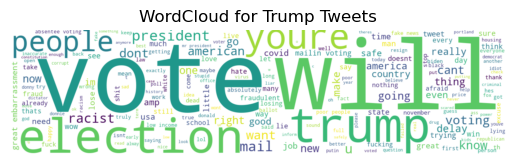

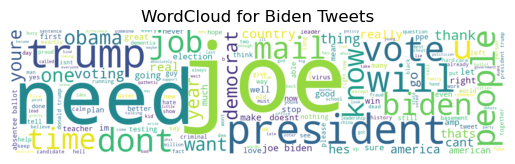

In [10]:
wc = WordCloud(width=1600, height=400, background_color="white").generate(" ".join(trump_reviews["clean_text"]))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud for Trump Tweets")
plt.show()

wc = WordCloud(width=1600, height=400, background_color="white").generate(" ".join(biden_reviews["clean_text"]))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud for Biden Tweets")
plt.show()

# Conclusion

From the sentiment analysis and visualizations:

- Joe Biden receives more **positive tweets** than Donald Trump.
- Donald Trump receives more **negative tweets** comparatively.

Hence, based on Twitter sentiment alone, **Joe Biden appears more favored** by the public.

> Note: Sentiment analysis from social media does not necessarily reflect actual election outcomes.
